## Implementation of various metrics 
This notebook is a direct copy of the one used in google colab and should not be run localy. 

In [41]:
%cd drive/MyDrive/Colab\ Notebooks

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks


In [73]:
from myDense import myDenseNetv2
import scipy.io
import numpy as np
import csv

print("test")

#wczytywanie danych
def import_data(t):
    t = 'dataset/' + t
    files = []
    positive = []
    with open(t + '.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in spamreader:
            row = t + '/' + row[0]
            positive.append(row[-25])
            files.append(row[:-1])
    return files, positive

train, y_train = import_data('training')

y_train = np.array(y_train)
y_train = np.where(y_train == '+', 1, y_train)
y_train = np.where(y_train == '-', 0, y_train)
print(y_train)
y_train = y_train.astype(np.float)

X_train = []
print("a")
for fileName in train:
    mat = scipy.io.loadmat(fileName)
    data = mat['only_lung_zoomed_3std']
    data2 = mat['type']

    # transformata Fouriera
    # X_train.append(np.fft.fft(data))

    X_train.append(data)
print("b")
X_train = np.array(X_train)
X_train = X_train[..., np.newaxis]
X_train = np.swapaxes(X_train, 1, 3)
X_train = np.swapaxes(X_train, 2, 3)

#kompilacja modelu
model = myDenseNetv2((48, 240, 360, 1))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#trenowanie modelu
model.fit(X_train,y_train,
          epochs=10,verbose=1,
          batch_size=1,)

test
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
a


KeyboardInterrupt: ignored

In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt

#wczytywanie danych
def import_data(t):
    t = 'dataset/' + t
    files = []
    positive = []
    with open(t + '.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in spamreader:
            row = t + '/' + row[0]
            positive.append(row[-24])
            files.append(row)
    return files, positive

validate, y_validate = import_data('validation')

y_validate = np.array(y_validate)
y_validate = np.where(y_validate == '+', 1, y_validate)
y_validate = np.where(y_validate == '-', 0, y_validate)
y_validate = y_validate.astype(np.float)

X_validate = []
for fileName in validate:
    mat = scipy.io.loadmat(fileName)
    data = mat['only_lung_zoomed_3std']
    data2 = mat['type']

    # transformata Fouriera
    # X_validate.append(np.fft.fft(data))

    X_validate.append(data)

X_validate = np.array(X_validate)
X_validate = X_validate[..., np.newaxis]
X_validate = np.swapaxes(X_validate, 1, 3)
X_validate = np.swapaxes(X_validate, 2, 3)

results = np.around(model.predict(X_validate, batch_size=12))
print("prawdo", results)

prawdo [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [72]:
# CONFUSION MATRIX
cfm = metrics.confusion_matrix(y_validate, results)
tn, fp, fn, tp = cfm.ravel()
print(f'True Positive: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True positive: {tp}')

True Positive: 0
False Positive: 15
False Negative: 3
True positive: 18


In [63]:
# ACCURACY
print("acc:", metrics.accuracy_score(y_validate, results))

acc: 0.5


In [64]:
# PRECISION
print("pre:", metrics.precision_score(y_validate, results))

pre: 0.5454545454545454


In [65]:
# RECALL
print("rec:", metrics.recall_score(y_validate, results))

rec: 0.8571428571428571


In [66]:
# SPECIFICITY
tn, fp, fn, tp = cfm.ravel()
specificity = tn / (tn+fp)
print("spe:", specificity)

spe: 0.0


In [67]:
# F1 SCORE
print("f1 score:", metrics.f1_score(y_validate, results))

f1 score: 0.6666666666666665


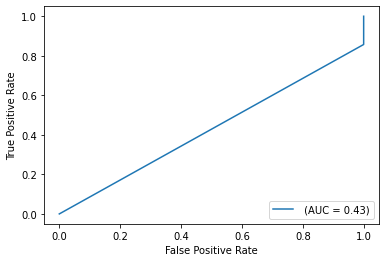

In [68]:
# ROC CURVE
fpr, tpr, _ = metrics.roc_curve(y_validate, results)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.roc_auc_score(y_validate, results), estimator_name="").plot()

In [69]:
# GINI COEFFICIENT
def gini(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad/np.mean(x)
    g = 0.5 * rmad
    return g

print(gini([1,2,3,4,5]))

0.26666666666666666


In [70]:
# cohen_kappa
print(metrics.cohen_kappa_score(y_validate, results))

-0.16129032258064524
